In [24]:
import gym
import torch

# Applies the chain rule to compute the gradient, grad, of the weights
# Records the resulting gradient, grad
# Performs the action, accumulates the reward, and updates the state
def run_episode(env, weight):
    state = env.reset()[0]
    grads = []  # gradients
    total_reward = 0
    is_done = False
    while not is_done:
        state = torch.from_numpy(state).type(torch.FloatTensor)
        # update action
        # 1. Calculates the probabilities, probs, for both actions based on the current state and input weight
        # 2. Samples an action, action, based on the resulting probabilities
        probs = torch.nn.Softmax()(torch.matmul(state, weight)) 
        action = int(torch.bernoulli(probs[1]).item())

        # get gradient
        # 1. Computes the derivatives, d_softmax, of the softmax function with the probabilities as input
        # 2. Divides the resulting derivatives, d_softmax, by the probabilities, probs, to get the derivatives, d_log, of the log term with respect to the policy
        d_softmax = torch.diag(probs) - probs.view(-1, 1) * probs
        d_log = d_softmax[action] / probs[action]
        grad = state.view(-1, 1) * d_log
        grads.append(grad)
        
        state, reward, is_done, is_truncated, _ = env.step(action)
        total_reward += reward
        if is_done:
            break
    return total_reward, grads

env = gym.make('CartPole-v1')
n_state = env.observation_space.shape[0]
n_action = env.action_space.n

n_episode = 1000
best_total_reward = 0

total_rewards = []

# noise_scale = 0.01 
# best_weight = torch.rand(n_state, n_action)
weight = torch.rand(n_state, n_action) # 上面两个不需要啦，新增这个

learning_rate = 0.001
for episode in range(n_episode):
    
    # 不需要用best_weight来更新 使用gradients更新weight
    # weight = best_weight + noise_scale * torch.rand(n_state, n_action)

    # 此时可以得到gradients啦
    total_reward, gradients = run_episode(env, weight)

    # 使用gradients更新weight，而不是best_weight
    # if total_reward >= best_total_reward:
    #     best_total_reward = total_reward
    #     best_weight = weight
    for i, gradient in enumerate(gradients):
        weight += learning_rate * gradient * (total_reward - i)

    total_rewards.append(total_reward)
    print('Episode {}: {}'.format(episode + 1, total_reward))

print('Average total reward over {} episode: {}'.format(n_episode, sum(total_rewards) / n_episode))


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10148\1384603417.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = torch.nn.Softmax()(torch.matmul(state, weight))


Episode 1: 38.0
Episode 2: 27.0
Episode 3: 27.0
Episode 4: 12.0
Episode 5: 16.0
Episode 6: 17.0
Episode 7: 44.0
Episode 8: 15.0
Episode 9: 23.0
Episode 10: 20.0
Episode 11: 12.0
Episode 12: 19.0
Episode 13: 23.0
Episode 14: 15.0
Episode 15: 27.0
Episode 16: 26.0
Episode 17: 10.0
Episode 18: 45.0
Episode 19: 55.0
Episode 20: 25.0
Episode 21: 22.0
Episode 22: 19.0
Episode 23: 54.0
Episode 24: 114.0
Episode 25: 32.0
Episode 26: 195.0
Episode 27: 17.0
Episode 28: 72.0
Episode 29: 44.0
Episode 30: 65.0
Episode 31: 22.0
Episode 32: 32.0
Episode 33: 131.0
Episode 34: 152.0
Episode 35: 43.0
Episode 36: 136.0
Episode 37: 47.0
Episode 38: 40.0
Episode 39: 84.0
Episode 40: 104.0
Episode 41: 63.0
Episode 42: 64.0
Episode 43: 104.0
Episode 44: 121.0
Episode 45: 70.0
Episode 46: 191.0
Episode 47: 70.0
Episode 48: 81.0
Episode 49: 25.0
Episode 50: 63.0
Episode 51: 55.0
Episode 52: 75.0
Episode 53: 73.0
Episode 54: 43.0
Episode 55: 60.0
Episode 56: 60.0
Episode 57: 103.0
Episode 58: 106.0
Episode 59: 

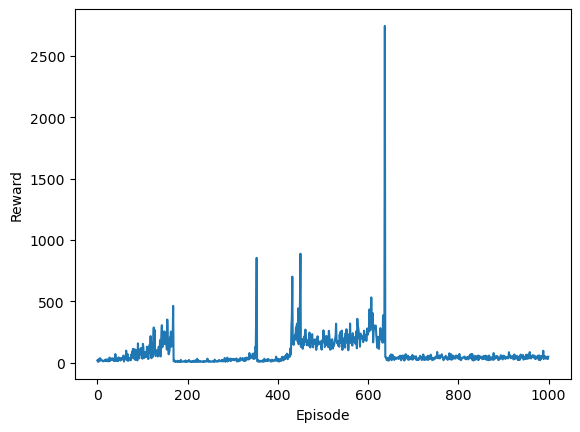

In [22]:
import matplotlib.pyplot as plt
plt.plot(total_rewards)

plt.xlabel('Episode')
plt.ylabel('Reward')

plt.show()

In [23]:
n_episode_eval = 100
total_rewards_eval = []
for episode in range(n_episode_eval):
    total_reward, _ = run_episode(env, weight)
    print('Episode {}: {}'.format(episode+1, total_reward))
    total_rewards_eval.append(total_reward)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10148\1384603417.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = torch.nn.Softmax()(torch.matmul(state, weight))


Episode 1: 53.0
Episode 2: 62.0
Episode 3: 45.0
Episode 4: 44.0
Episode 5: 38.0
Episode 6: 51.0
Episode 7: 54.0
Episode 8: 64.0
Episode 9: 30.0
Episode 10: 46.0
Episode 11: 53.0
Episode 12: 33.0
Episode 13: 41.0
Episode 14: 66.0
Episode 15: 53.0
Episode 16: 49.0
Episode 17: 34.0
Episode 18: 42.0
Episode 19: 25.0
Episode 20: 35.0
Episode 21: 29.0
Episode 22: 53.0
Episode 23: 42.0
Episode 24: 47.0
Episode 25: 51.0
Episode 26: 52.0
Episode 27: 40.0
Episode 28: 80.0
Episode 29: 36.0
Episode 30: 40.0
Episode 31: 30.0
Episode 32: 55.0
Episode 33: 61.0
Episode 34: 51.0
Episode 35: 45.0
Episode 36: 44.0
Episode 37: 36.0
Episode 38: 59.0
Episode 39: 55.0
Episode 40: 56.0
Episode 41: 50.0
Episode 42: 39.0
Episode 43: 34.0
Episode 44: 49.0
Episode 45: 47.0
Episode 46: 40.0
Episode 47: 60.0
Episode 48: 57.0
Episode 49: 53.0
Episode 50: 33.0
Episode 51: 35.0
Episode 52: 75.0
Episode 53: 71.0
Episode 54: 49.0
Episode 55: 71.0
Episode 56: 33.0
Episode 57: 46.0
Episode 58: 69.0
Episode 59: 69.0
Episod